# 1. Pre-processing

## 1.1 Modules Import

In [1]:
#Import libraries
import os
import ipywidgets as widgets
import shutil
import h5py
import numpy as np

# Widgets style definition
style = {'description_width': '150px'}

## 1.2 Data Source and Destination Folder Path

In [5]:
# Input the path containing all .h5 files
iter_path_source_input = widgets.Text(
    value= '/global/cscratch1/sd/vthw28/ChenXY/Prior_Pflotran_Output/',
    description='.h5 Source Folder Path:',
    disabled=False,
    style=style)

# Path where to make a folder to put all processing data
data_path_main_input = widgets.Text(
    value= '/global/cscratch1/sd/vthw28/',
    description='Result Folder Path:',
    disabled=False,
    style=style)

# Input folder name
folder_name_input = widgets.Text(
    value= 'Prior_Pflotran_Output',
    description='Result Folder Name:',
    disabled=False,
    style=style)

display(iter_path_source_input,data_path_main_input,folder_name_input)

Text(value='/global/cscratch1/sd/vthw28/ChenXY/Prior_Pflotran_Output/', description='.h5 Source Folder Path:',…

Text(value='/global/cscratch1/sd/vthw28/', description='Result Folder Path:', style=DescriptionStyle(descripti…

Text(value='Prior_Pflotran_Output', description='Result Folder Name:', style=DescriptionStyle(description_widt…

## 1.3 Make Folders for Every File

In [8]:
# Define data processing path to make files
data_path_main = data_path_main_input.value

# Define the iteration path
# iter_path_source = '/global/project/projectdirs/m1800/hydrogeophysics/'
iter_path_source = iter_path_source_input.value

# Folders inside the path
iter_name = os.listdir(iter_path_source)

# Select one iteration folder
iter_folder_name = folder_name_input.value

print('Making folder named','\x1b[0;30;42m'+iter_folder_name+'\x1b[0m','under the path','\x1b[0;30;42m'+data_path_main+'\x1b[0m')

data_path_iter = data_path_main+iter_folder_name
iter_name_check = os.listdir(data_path_main)

if iter_folder_name in iter_name_check:
    print('The directory named', '\x1b[0;30;41m'+data_path_iter+'\x1b[0m','has existed.')
else:
    os.mkdir(data_path_iter)
    print ('Successfully created the directory', '\x1b[0;30;42m'+data_path_iter+'\x1b[0m')

Making folder named Prior_Pflotran_Output under the path /global/cscratch1/sd/vthw28/
The directory named /global/cscratch1/sd/vthw28/Prior_Pflotran_Output has existed.


In [21]:
real_path_source = iter_path_source

# Files inside the path with extension '.h5' is the pflotran simulation files. 
real_file_name = [f for f in os.listdir(real_path_source) if f.endswith('.h5')]
real_file_name.sort()
real_file_num = len(real_file_name)
print('For the selected', '\x1b[0;30;42m'+real_path_source+'\x1b[0m',', there are', '\x1b[0;30;42m'+str(real_file_num)+'\x1b[0m','realization files.')

real_name_list = []
# Check the realization name
for i in range(real_file_num):
    real_name_len = len(real_file_name[i])
    
    real_name = real_file_name[i][0:(real_name_len-3)]
    real_name_list.append(real_name)

real_name_list = list(set(real_name_list))
real_name_list.sort()

real_name_num = len(real_name_list)
data_path_real = data_path_iter+'/'
print('There would be','\x1b[0;30;42m'+str(real_name_num)+'\x1b[0m','folders created under the path','\x1b[0;30;42m'+data_path_real+'\x1b[0m')
print('Making directory and copying pflotran simulation files:')
real_name_check = os.listdir(data_path_iter)

for i in range (real_name_num):
    real_name_prefix =  real_name_list[i]
    data_path_real = data_path_iter+'/' +  real_name_prefix
    
    if real_name_prefix in real_name_check:
        print('The directory named', '\x1b[0;30;41m'+real_name_prefix+'\x1b[0m','has existed.')
    else:
        os.mkdir(data_path_real)
        print('Successfully created the directory', '\x1b[0;30;42m'+data_path_real+'\x1b[0m')

For the selected /global/cscratch1/sd/vthw28/ChenXY/Prior_Pflotran_Output/ , there are 200 realization files.
There would be 200 folders created under the path /global/cscratch1/sd/vthw28/Prior_Pflotran_Output/
Making directory and copying pflotran simulation files:
Successfully created the directory /global/cscratch1/sd/vthw28/Prior_Pflotran_Output/pflotranR1-000
Successfully created the directory /global/cscratch1/sd/vthw28/Prior_Pflotran_Output/pflotranR10-000
Successfully created the directory /global/cscratch1/sd/vthw28/Prior_Pflotran_Output/pflotranR100-000
Successfully created the directory /global/cscratch1/sd/vthw28/Prior_Pflotran_Output/pflotranR101-000
Successfully created the directory /global/cscratch1/sd/vthw28/Prior_Pflotran_Output/pflotranR102-000
Successfully created the directory /global/cscratch1/sd/vthw28/Prior_Pflotran_Output/pflotranR103-000
Successfully created the directory /global/cscratch1/sd/vthw28/Prior_Pflotran_Output/pflotranR104-000
Successfully created t

## 1.4 Check Input Files 

In [25]:
input_file_path_input = widgets.Text(
    value= '/global/u1/v/vthw28/1/',
    description='Input File Path:',
    disabled=False,
    style=style)

display(input_file_path_input)

Text(value='/global/u1/v/vthw28/1/', description='Input File Path:', style=DescriptionStyle(description_width=…

In [51]:
# Define input files path
input_file_path = input_file_path_input.value

print('Select E4D Mesh Files: .1.ele, .1.node, .1.neigh, .1.face, .trn')
mesh_ele_files = [f for f in os.listdir(input_file_path) if f.endswith('.1.ele')]
mesh_node_files = [f for f in os.listdir(input_file_path) if f.endswith('.1.node')]
mesh_neigh_files = [f for f in os.listdir(input_file_path) if f.endswith('.1.neigh')]
mesh_face_files = [f for f in os.listdir(input_file_path) if f.endswith('.1.face')]
mesh_trn_files = [f for f in os.listdir(input_file_path) if f.endswith('.trn')]

mesh_ele_name_input = widgets.RadioButtons(
    options= mesh_ele_files,
    description='Element File:',
    disabled=False
)
mesh_node_name_input = widgets.RadioButtons(
    options= mesh_node_files,
    description='Node File:',
    disabled=False
)
mesh_face_name_input = widgets.RadioButtons(
    options= mesh_face_files,
    description='Face File:',
    disabled=False
)
mesh_neigh_name_input = widgets.RadioButtons(
    options= mesh_neigh_files,
    description='Neigh File:',
    disabled=False
)
mesh_trn_name_input = widgets.RadioButtons(
    options= mesh_trn_files,
    description='trn File:',
    disabled=False
)

display(mesh_ele_name_input, mesh_node_name_input, mesh_face_name_input, mesh_neigh_name_input, mesh_trn_name_input )

print('Select E4D Visulization File: .exo')
mesh_exo_files = [f for f in os.listdir(input_file_path) if f.endswith('.exo')]

mesh_exo_name_input = widgets.RadioButtons(
    options= mesh_exo_files,
    description='exo File:',
    disabled=False
)

display(mesh_exo_name_input)

print('Select Mesh Interpolation Matrix File: _map.bin')
mesh_inter_files = [f for f in os.listdir(input_file_path) if f.endswith('_map.bin')]

mesh_inter_input = widgets.RadioButtons(
    options= mesh_inter_files,
    description='map.bin:',
    disabled=False
)

display(mesh_inter_input)

print('Select Variable Mapping Files: baseline sigma file and petrophysical parameter file.')
bc_sig_files = [f for f in os.listdir(input_file_path) if f.endswith('.sig')]

bc_sig_input = widgets.RadioButtons(
    options= bc_sig_files,
    description='BC Sigma:',
    disabled=False
)

display(bc_sig_input)

wax_simt_files = [f for f in os.listdir(input_file_path) if f.startswith('wax_smit') and f.endswith('.txt')]
wax_smit_files_num = len(wax_simt_files)

if wax_smit_files_num != 0:
    wax_smit_input = widgets.RadioButtons(
    options= wax_simt_files,
    description='Wax_smit:',
    disabled=False
    )
    
    display(wax_smit_input)
    
else:
    print('\x1b[0;30;41m'+'No petrophysical parameter file available.'+'\x1b[0m')

print('Select Jupyter Notebook: .ipynb')
py_note_files = [f for f in os.listdir(input_file_path) if f.endswith('.ipynb')]

py_note_input = widgets.RadioButtons(
    options= py_note_files,
    description='Notebook:',
    disabled=False
)

display(py_note_input)

print('Select Mapping Fortran Script: .f90')
map_for_files = [f for f in os.listdir(input_file_path) if f.endswith('.f90')]

map_for_input = widgets.RadioButtons(
    options= map_for_files,
    description='Fortran:',
    disabled=False
)

display(map_for_input)

print('Select porosity data file: .h5')
porosity_files = [f for f in os.listdir(input_file_path) if f.startswith('pflotran') and f.endswith('.h5')]

porosity_file_input = widgets.RadioButtons(
    options= porosity_files,
    description='Porosity File:',
    disabled=False
)

display(porosity_file_input)

if 'E4D_comp.srv' in os.listdir(input_file_path):
    E4D_comp_indi = 1
    print('\x1b[0;30;42m' +'Computational Survey File exists.'+'\x1b[0m')
    
else:
    E4D_comp_indi = 0
    print('\x1b[0;30;41m' +'Computational Survey File does not exists or not named with E4D_comp.srv'+'\x1b[0m')

Select E4D Mesh Files: .1.ele, .1.node, .1.neigh, .1.face, .trn


RadioButtons(description='Element File:', options=('E4D_04.1.ele', 'E4D_15.1.ele', 'E4D_1.1.ele'), value='E4D_…

RadioButtons(description='Node File:', options=('E4D_1.1.node', 'E4D_15.1.node', 'E4D_04.1.node'), value='E4D_…

RadioButtons(description='Face File:', options=('E4D_1.1.face', 'E4D_04.1.face', 'E4D_15.1.face'), value='E4D_…

RadioButtons(description='Neigh File:', options=('E4D_04.1.neigh', 'E4D_15.1.neigh', 'E4D_1.1.neigh'), value='…

RadioButtons(description='trn File:', options=('E4D_15.trn', 'E4D_1.trn', 'E4D_04.trn'), value='E4D_15.trn')

Select E4D Visulization File: .exo


RadioButtons(description='exo File:', options=('E4D_15.exo', 'E4D_1.exo', 'E4D_04.exo'), value='E4D_15.exo')

Select Mesh Interpolation Matrix File: _map.bin


RadioButtons(description='map.bin:', options=('E4D_1_map.bin', 'E4D_15_map.bin', 'E4D_04_map.bin'), value='E4D…

Select Variable Mapping Files: baseline sigma file and petrophysical parameter file.


RadioButtons(description='BC Sigma:', options=('E4D_15.sig', 'E4D_1.sig', 'E4D_04.sig'), value='E4D_15.sig')

RadioButtons(description='Wax_smit:', options=('wax_smit.txt',), value='wax_smit.txt')

Select Jupyter Notebook: .ipynb


RadioButtons(description='Notebook:', options=('Forward_Mode.ipynb',), value='Forward_Mode.ipynb')

Select Mapping Fortran Script: .f90


RadioButtons(description='Fortran:', options=('mapit.f90',), value='mapit.f90')

Select porosity data file: .h5


RadioButtons(description='Porosity File:', options=('pflotran_porosity-000.h5',), value='pflotran_porosity-000…

Computational Survey File exists.


In [52]:
if wax_smit_files_num == 0:

    print('Please input the values of the petrophysical parameters:')
    a_input = widgets.FloatText(value=1,description='a:',disabled=False)
    B_input = widgets.FloatText(value=1e-5,description='B:',disabled=False)
    Qv_input = widgets.FloatText(value=1e-6,description='Qv:',disabled=False)
    c_input = widgets.FloatText(value=1.3,description='c:',disabled=False)
    m_input = widgets.FloatText(value=2,description='m:',disabled=False)
    t_input = widgets.FloatText(value=2e-2,description='t:',disabled=False)
    
    display(a_input,B_input,Qv_input,c_input,m_input,t_input)

In [53]:
print('The input file path: ', '\x1b[0;30;42m' +input_file_path+ '\x1b[0m')

# Check the prefix of the E4D Mesh files are same or not.
mesh_ele_name = mesh_ele_name_input.value
mesh_ele_name_len = len(mesh_ele_name)
mesh_ele_name_prefix = mesh_ele_name[0:(mesh_ele_name_len-6)]
    
mesh_node_name = mesh_node_name_input.value
mesh_node_name_len = len(mesh_node_name)
mesh_node_name_prefix = mesh_node_name[0:(mesh_node_name_len-7)]

mesh_face_name = mesh_face_name_input.value
mesh_face_name_len = len(mesh_face_name)
mesh_face_name_prefix = mesh_face_name[0:(mesh_face_name_len-7)]
    
mesh_trn_name = mesh_trn_name_input.value
mesh_trn_name_len = len(mesh_trn_name)
mesh_trn_name_prefix = mesh_ele_name[0:(mesh_trn_name_len-4)]

mesh_neigh_name = mesh_neigh_name_input.value
mesh_neigh_name_len = len(mesh_neigh_name)
mesh_neigh_name_prefix = mesh_neigh_name[0:(mesh_neigh_name_len-8)]
    
if mesh_ele_name_prefix == mesh_node_name_prefix == mesh_face_name_prefix == mesh_trn_name_prefix:
    prefix = mesh_ele_name_prefix
    print ('The prefix of all the E4D mesh files are the same: ','\x1b[0;30;42m' +prefix+ '\x1b[0m')
else:
    print ('The prefix looks different. Please check the files or rename them.')

# Read Mesh exo selection and show it.
exo_file = mesh_exo_name_input.value
print ('The Mesh Visulization File: ','\x1b[0;30;42m' +exo_file+ '\x1b[0m')
    
# Read PFLOTRAN_E4D Mesh Interpolation matrix selection and show it.
mapfile = mesh_inter_input.value
print ('The Mesh Interpolation Matrix: ','\x1b[0;30;42m' +mapfile+ '\x1b[0m')

# Read Variable Mapping selection and show it.
bc_sig = bc_sig_input.value

if wax_smit_files_num == 0:
    f = open(input_file_path+mesh_ele_name)
    f_ele_lines = f.readlines()
    lines_NO = f_ele_lines[0].split()
    lines_num = int(lines_NO[0])
    
    ff = open(input_file_path+'wax_smit.txt', 'w+')

    ff.write(lines_NO[0])
    ff.write('\n')
    wax_sim_line = str(a_input.value)+' '+str(B_input.value)+' '+str(Qv_input.value)+' '+str(c_input.value)+' '+str(m_input.value)+' '+str(t_input.value)

    for i in range(lines_num):
        ff.write(wax_sim_line)
        ff.write('\n')

    petro_file_name = 'wax_smit.txt'
    
else:
    petro_file_name = wax_smit_input.value
    f = open(input_file_path+mesh_ele_name)
    f_ele_lines = f.readlines()
    f_ele_num = int(f_ele_lines[0].split()[0])
    ff = open(input_file_path+petro_file_name)
    f_petro_lines = ff.readlines()
    f_petro_num = int(f_petro_lines[0].split()[0])
    
    if f_ele_num == f_petro_num:
        print('\x1b[0;30;42m'+'The element number of E4D Mesh files can match Petrophysical Parameter file.'+ '\x1b[0m')
    else:
        print('\x1b[0;30;41m'+'The element number of E4D Mesh files can not match Petrophysical Parameter file, rewriting...'+ '\x1b[0m')

ff.close()
f.close()
    
    
print('The petrophysical parameter File is ', '\x1b[0;30;42m'+petro_file_name+'\x1b[0m')

print ('The Baseline Conductivity File: ','\x1b[0;30;42m' +bc_sig+ '\x1b[0m')

# Read Jupyter Notebook selection and show it.
py_note = py_note_input.value
print ('The Jupyter Notebook: ','\x1b[0;30;42m' +py_note+ '\x1b[0m')

# Read Mapping Fortran selection and show it.
map_for = map_for_input.value
print ('The Mapping Fortran: ','\x1b[0;30;42m' +map_for+ '\x1b[0m')

porosity_file = porosity_file_input.value
print ('The Mapping Fortran: ','\x1b[0;30;42m' +porosity_file+ '\x1b[0m')

if E4D_comp_indi == 1:
    print('The computational survey file: ','\x1b[0;30;42m'+'E4D_comp.srv'+ '\x1b[0m')
    
if E4D_comp_indi == 0:
    print('\x1b[0;30;41m' +'Computational Survey File does not exists or not named with E4D_comp.srv'+'\x1b[0m')

The input file path:  /global/u1/v/vthw28/1/
The prefix of all the E4D mesh files are the same:  E4D_1
The Mesh Visulization File:  E4D_1.exo
The Mesh Interpolation Matrix:  E4D_1_map.bin
The element number of E4D Mesh files can match Petrophysical Parameter file.
The petrophysical parameter File is  wax_smit.txt
The Baseline Conductivity File:  E4D_1.sig
The Jupyter Notebook:  Forward_Mode.ipynb
The Mapping Fortran:  mapit.f90
The Mapping Fortran:  pflotran_porosity-000.h5
The computational survey file:  E4D_comp.srv


In [22]:
f = open(input_file_path+'parameter.txt','w+')

f.write('E4D_mesh_prefix '+prefix)
f.write('\n')
f.write('Mesh_interpolation_matrix '+mapfile)
f.write('\n')
f.write('Petrophysical_parameter_file '+petro_file_name)
f.write('\n')
f.write('Baseline_cond_file '+bc_sig)
f.write('\n')
f.write('Porosity_data_file '+porosity_file)

f.close()

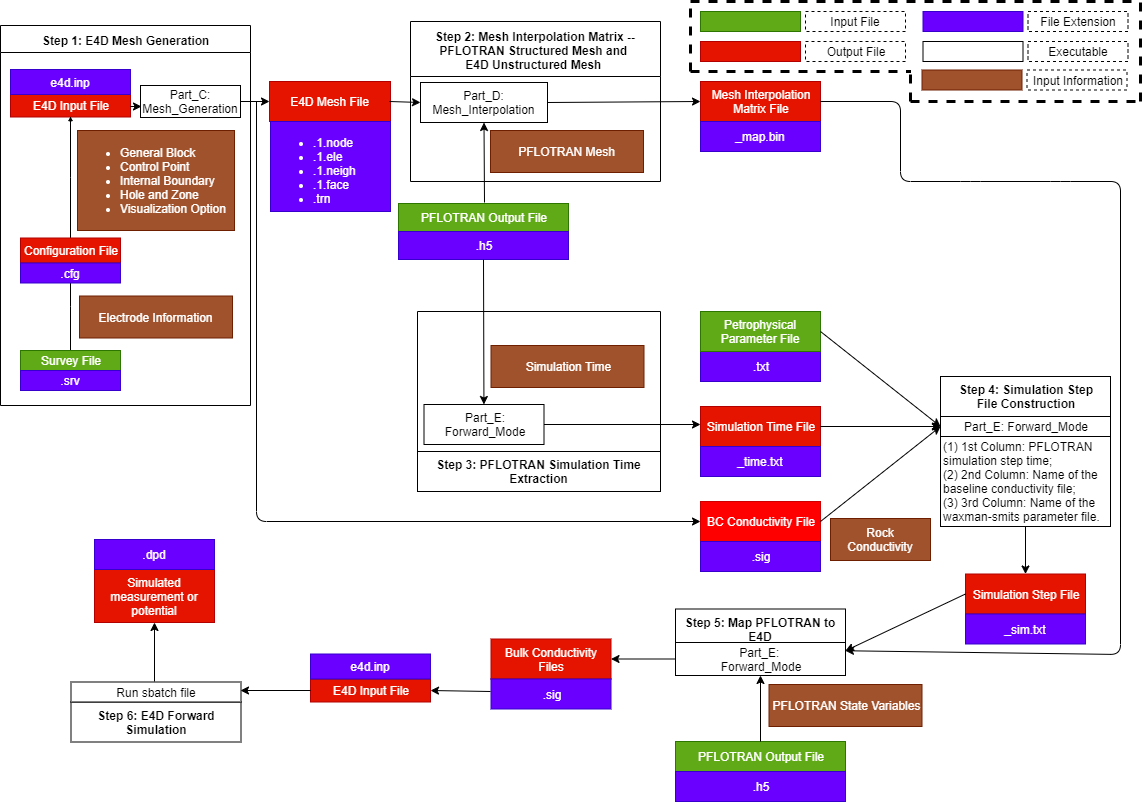

In [23]:
from IPython.display import Image
# from IPython.core.display import HTML 
Image(filename = '/global/cscratch1/sd/vthw28/PartE_Forward_Mode/Notebook_Picture/' + 'workflow_diagram.png', width=1000, height=1000)

# 2. Copy Files

## 2.1 Copy ipynb

In [43]:
# copy .ipynb files

for i in range (2):
    real_name_prefix =  real_name_list[i]
    data_path_real = data_path_iter+'/' +  real_name_prefix
    
    shutil.copy(input_file_path+py_note, data_path_real)
    # shutil.copy(input_file_path+mesh_trn_name, data_path_real)

## Copy *.h5 Files

In [42]:
# Copy .h5 files

#real_name_num

for i in range (2):
    real_copy_source_name = real_name_list[i]
    real_copy_source_name = [f for f in os.listdir(real_path_source) if f.startswith(real_copy_source_name) and f.endswith('.h5')]
    
    real_name_prefix =  real_name_list[i]
    data_path_real = data_path_iter+'/' +  real_name_prefix
    
    for j in range(len(real_copy_source_name)):
        shutil.copy(real_path_source+'/'+real_copy_source_name[j], data_path_real)

# 3. Write Batch Job Files

## 3.1 ipynb Batch Job File

In [46]:
ipynb_name = iter_folder_name + '_ipynb_run.sh'

f = open(ipynb_name,'w+')

f.write('#!/bin/bash \n\n')

for i in range(real_name_num):
    f.write('cd '+data_path_iter+'/'+real_name_list[i])
    f.write('\n')
    f.write('jupyter nbconvert --execute '+py_note+' --ExecutePreprocessor.timeout=1800')
    f.write('\n')
    
f.close()

## 3.2 E4D Batch Job Submission 

In [8]:
e4d_run_sh = iter_folder_name + '_e4d_forward.sh'

f = open(e4d_run_sh,'w+')

f.write('#!/bin/bash \n')
f.write('#SBATCH --qos=regular \n')
f.write('#SBATCH --time=05:00:00 \n')
f.write('#SBATCH --nodes=1600 \n')
f.write('#SBATCH --tasks-per-node=45 \n')
f.write('#SBATCH --constraint=knl \n \n')

for i in range(real_name_num):
    f.write('cd /global/cscratch1/sd/vthw28/Prior_Pflotran_Output/Prior_Pflotran_Output-R'+str(i+1))
    f.write('\n')
    f.write('~/test/petsc/arch-linux-c-opt/bin/mpirun -np 353 ~/test/e4d_dev/bin/e4d ')
    f.write(' &')
    f.write('\n')
    
f.write('wait')

f.close()

In [27]:
# jupyter nbconvert --execute Forward_Mode.ipynb --ExecutePreprocessor.timeout=1800